In [1]:
!pip install tflearn
!pip install nibabel

#Data Preprocessing - Make Images 50x50x20 (3D imgs)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import math
import nibabel as nib

Code from: https://github.com/AshwanthRamji/Lung-Cancer-Detection-Using-3D-Convolutional-Neural-Networks
Explained in: https://drive.google.com/file/d/15fw8Gd1zrWg8szENRk6FuwVDNPhDUfgo/view


In [4]:
dataDirectory = 'drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/' #@param
lungPatients = os.listdir(dataDirectory)
labelCSVFile = 'drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TB_y_train.csv' #@param
labels = pd.read_csv(labelCSVFile, index_col=0)
size = 50 #@param
NoSlices = 20 #@param

In [5]:
def chunks(l, n):
    count = 0
    for i in range(0, len(l), n):
        if (count < NoSlices):
            yield l[i:i + n]
            count = count + 1


def mean(l):
    return sum(l) / len(l)


def dataProcessing(patient_file, labels_df, size=50, noslices=20, visualize=False):
    patient_num = patient_file.rsplit('.')
    print(patient_num[0])
    label = labels_df.loc[patient_num[0]]['has_calcification']
    patient_abs_path = dataDirectory + patient_file
    print(patient_abs_path)
    imgs = nib.load(patient_abs_path)
    #slices = [dicom.read_file(patient_abs_path + '/' + s, force=True) for s in os.listdir(patient_abs_path)]
    #slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))
    slices = []
    print(imgs.shape)
    for slice in range(imgs.shape[2]):
      try:
      #TRY NEW LINES
        '''
        norm_img = np.zeros((size,size))
        cv2.normalize(imgs.get_fdata()[:,:,slice], norm_img, 0, 255, cv2.NORM_MINMAX)
        print(norm_img)
        slices.append(norm_img)
        '''
      #OLD LINE THAT WORKED
        slices.append(imgs.get_fdata()[:,:,slice])
        #print(type(imgs.get_fdata()[:,:,slice]))
      except:
        print('skipped', patient_abs_path)
        return None, -1
    new_slices = []
    slices = [cv2.resize(np.array(each_slice), (size, size)) for each_slice in slices]

    chunk_sizes = math.floor(len(slices) / noslices)
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)

    if label == 1:
        label = np.array([0, 1])
    elif label == 0:
        label = np.array([1, 0])
    return np.array(new_slices), label


imageData = []
for patient in enumerate(lungPatients):
    #print(patient[1])
    try:
        img_data, label = dataProcessing(patient[1], labels, size=size, noslices=NoSlices)
        #print('img_data', img_data)
        if(not img_data is None):
          imageData.append([img_data, label,patient])
    except KeyError as e:
        print('Data is unlabeled')

np.save('imageDataNew-{}-{}-{}.npy'.format(size, size, NoSlices), imageData)

TRN_55
drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TRN_55.nii.gz
(512, 512, 471)
TRN_12
drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TRN_12.nii.gz
(512, 512, 61)
TRN_56
drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TRN_56.nii.gz
(512, 512, 66)
TRN_25
drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TRN_25.nii.gz
(512, 512, 260)
TRN_08
drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TRN_08.nii.gz
(512, 512, 470)
TRN_27
drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TRN_27.nii.gz
(512, 512, 69)
TRN_44
drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TRN_44.nii.gz
(512, 512, 157)
TRN_17
drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TRN_17.nii.gz
(512, 512, 489)
TRN_06
drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TRN_06.nii.gz
(512, 512, 62)
TRN_30
drive/MyDrive/Colab Notebooks/Arti

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch 1 completed out of 10 loss: 5105226969088.0
Accuracy: 0.8
Epoch 2 completed out of 10 loss: 3369622327296.0
Accuracy: 0.6
Epoch 3 completed out of 10 loss: 1360340615168.0
Accuracy: 0.6
Epoch 4 completed out of 10 loss: 2790146801664.0
Accuracy: 0.6
Epoch 5 completed out of 10 loss: 1513289150464.0
Accuracy: 0.8
Epoch 6 completed out of 10 loss: 1044248821760.0
Accuracy: 0.8
Epoch 7 completed out of 10 loss: 778668824576.0
Accuracy: 0.6
Epoch 8 completed out of 10 loss: 1228453371904.0
Accuracy: 0.6
Epoch 9 completed out of 10 loss: 1003596673024.0
Accuracy: 0.6
Epoch 10 completed out of 10 loss:

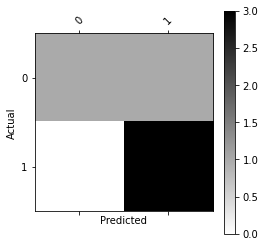

In [6]:
#import tensorflow as tf
#depricate tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
import tflearn
from tflearn.layers.conv import conv_3d, max_pool_3d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

imageData = np.load('imageDataNew-50-50-20.npy', allow_pickle=True)
trainingData = imageData[0:50]
validationData = imageData[-10:-5]

x = tf.placeholder('float')
y = tf.placeholder('float')
size = 50
keep_rate = 0.8
NoSlices = 20


def convolution3d(x, W):
    return tf.nn.conv3d(x, W, strides=[1, 1, 1, 1, 1], padding='SAME')


def maxpooling3d(x):
    return tf.nn.max_pool3d(x, ksize=[1, 2, 2, 2, 1], strides=[1, 2, 2, 2, 1], padding='SAME')


def cnn(x):
    x = tf.reshape(x, shape=[-1, size, size, NoSlices, 1])
    convolution1 = tf.nn.relu(
        convolution3d(x, tf.Variable(tf.random_normal([3, 3, 3, 1, 32]))) + tf.Variable(tf.random_normal([32])))
    convolution1 = maxpooling3d(convolution1)
    convolution2 = tf.nn.relu(
        convolution3d(convolution1, tf.Variable(tf.random_normal([3, 3, 3, 32, 64]))) + tf.Variable(
            tf.random_normal([64])))
    convolution2 = maxpooling3d(convolution2)
    convolution3 = tf.nn.relu(
        convolution3d(convolution2, tf.Variable(tf.random_normal([3, 3, 3, 64, 128]))) + tf.Variable(
            tf.random_normal([128])))
    convolution3 = maxpooling3d(convolution3)
    convolution4 = tf.nn.relu(
        convolution3d(convolution3, tf.Variable(tf.random_normal([3, 3, 3, 128, 256]))) + tf.Variable(
            tf.random_normal([256])))
    convolution4 = maxpooling3d(convolution4)
    convolution5 = tf.nn.relu(
        convolution3d(convolution4, tf.Variable(tf.random_normal([3, 3, 3, 256, 512]))) + tf.Variable(
            tf.random_normal([512])))
    convolution5 = maxpooling3d(convolution4)
    fullyconnected = tf.reshape(convolution5, [-1, 1024])
    fullyconnected = tf.nn.relu(
        tf.matmul(fullyconnected, tf.Variable(tf.random_normal([1024, 1024]))) + tf.Variable(tf.random_normal([1024])))
    fullyconnected = tf.nn.dropout(fullyconnected, keep_rate)
    output = tf.matmul(fullyconnected, tf.Variable(tf.random_normal([1024, 2]))) + tf.Variable(tf.random_normal([2]))
    return output


def network(x):
    prediction = cnn(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)
    epochs = 10
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            epoch_loss = 0
            for data in trainingData:
                try:
                    X = data[0]
                    Y = data[1]
                    _, c = session.run([optimizer, cost], feed_dict={x: X, y: Y})
                    epoch_loss += c
                except Exception as e:
                    pass

            correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
           # if tf.argmax(prediction, 1) == 0:
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
            print('Epoch', epoch + 1, 'completed out of', epochs, 'loss:', epoch_loss)
            # print('Correct:',correct.eval({x:[i[0] for i in validationData], y:[i[1] for i in validationData]}))
            print('Accuracy:', accuracy.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]}))
        print('Final Accuracy:', accuracy.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]}))
        patients = []
        actual = []
        predicted = []

        finalprediction = tf.argmax(prediction, 1)
        actualprediction = tf.argmax(y, 1)
        for i in range(len(validationData)):
            patients.append(validationData[i][2])
        for i in finalprediction.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]}):
            if(i==1):
                predicted.append("Calcification")
            else:
                predicted.append("No Calcification")
        for i in actualprediction.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]}):
            if(i==1):
                actual.append("Calcification")
            else:
                actual.append("No Calcification")
        for i in range(len(patients)):
            print("Patient: ",patients[i])
            print("Actual: ", actual[i])
            print("Predcited: ", predicted[i])

        from sklearn.metrics import confusion_matrix
        y_actual = pd.Series(
            (actualprediction.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]})),
            name='Actual')
        y_predicted = pd.Series(
            (finalprediction.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]})),
            name='Predicted')
        df_confusion = pd.crosstab(y_actual, y_predicted)
        print(df_confusion)

        def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):\
            
            plt.matshow(df_confusion, cmap=cmap)  # imshow  
            # plt.title(title)
            plt.colorbar()
            tick_marks = np.arange(len(df_confusion.columns))
            plt.xticks(tick_marks, df_confusion.columns, rotation=45)
            plt.yticks(tick_marks, df_confusion.index)
            # plt.tight_layout()
            plt.ylabel(df_confusion.index.name)
            plt.xlabel(df_confusion.columns.name)
            plt.show()
        plot_confusion_matrix(df_confusion)
        # print(y_true,y_pred)
        # print(confusion_matrix(y_true, y_pred))
        # print(actualprediction.eval({x:[i[0] for i in validationData], y:[i[1] for i in validationData]}))
        # print(finalprediction.eval({x:[i[0] for i in validationData], y:[i[1] for i in validationData]}))
network(x)